In [97]:
import numpy as np
import scipy.stats
import scipy.linalg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import sklearn as sk
import sklearn.gaussian_process as gp
warnings.filterwarnings('ignore')
%matplotlib inline

In [98]:
class Transaction(object):
    
    N = 10
    n = 2900
    endtime = 0
    
    # Initialize. Complete manual initialization
    def __init__(self, time,tran_id, sender_id, receiver_id, amount, fee):
        self.starttime = time
        self.tran_id = tran_id
        self.sender_id = sender_id
        self.receiver_id = receiver_id
        self.amount = amount
        self.fee = fee
        self.total = fee+amount
        
    #Initialize. amount and fees determined using predetermined rates
    def __init__(self,time):
        self.starttime = time
        self.tran_id = 1
        self.sender_id = np.random.randint(0,self.n+1)
        self.receiver_id = np.random.randint(0,self.n+1)
        self.amount = np.random.randint(5,26)
        self.fee = (np.random.randint(1,3)/100)*self.amount
        self.total = self.amount+self.fee
    
    # Print a Transaction
    def __repr__(self):
        send = str(self.fee) 
        return send

In [5]:
hi = [1,2, 9, 17, 4,3,2]
newa =  np.argsort(hi)[-2:]
h = np.array(hi)[newa]
print(newa)

[2 3]


In [ ]:
    zipped = zip(duration, amountt)
    saved = pd.DataFrame(list(sorted(zipped, key=lambda x: x[1])), columns=['delay(hours)', 'fee amount'])
    sns.jointplot(x="fee amount", y="delay(hours)", data=saved, kind="kde")
    
     plt.figure()
    cumu = np.cumsum(Block.totalamount)
    ave = cumu/Block.time
    plt.step(Block.time, ave, where='post')
    plt.ylabel("Average Amount Transferred / Hour")
    plt.xlabel("Time (Hours)")
    plt.title("Average Amount of Money Transferred per Hour when K={}".format(i))
    plt.show()
    
    plt.figure()
    newb = Block.NumberinBlock[1500:]
    newt= np.array(Block.time[1500:]) - Block.time[1499]
    bnum = np.cumsum(Block.NumberinBlock)
    avenum = bnum/Block.time
    plt.step(Block.time, avenum, where='post')
    plt.ylabel("Transactions Completed / Hour")
    plt.xlabel("Time (Hours)")
    plt.title("Average Number of Transactions per Hour when K={}".format(i))
    plt.show()
    
    plt.figure()
    plt.step(times, qsize, where='post')
    plt.ylabel("Queue Length")
    plt.xlabel("Time (Hours)")
    plt.title("Queue Length when $\mu$ = 30,  K={}".format(i))
    plt.show()

In [99]:
import queue

#create an object for blocks, such that in the poisson process there is less to write
class BlockQueue(object):
       
    K = 12
    N = 10
    n = 2900
    MiningRate = 10
    
    # Initialize a Queue
    def __init__(self, MiningRate, K):
        self.MiningRate = MiningRate
        self.waitingentities = [] #priority
        self.NumberinBlock = []
        self.totalfee = []
        self.accounts = np.zeros(self.N)
        self.totalamount = []
        self.time = []
        self.Numblocks = 0
        self.finished = []
        self.K = K
        self.avetime = []
        
    # Print a Queue (just its name and the entire list of waiting Entities)
    def __repr__(self):
        q = " NumWaiting: " + str(len(self.waitingentities)) 
        return q
    
    # A new Entity arrives at this Queue
    def ArriveatQueue(self, newtrans):
        self.waitingentities.append(newtrans)
    
    # Exit queue and move to service
    def pushBlock(self,t):
        self.time.append(t)
        number = np.minimum(len(self.waitingentities),self.K)
        self.NumberinBlock.append(number)
        winner = np.random.randint(0,self.N)
        feesum = 0
        totsum = 0
        tosort = np.array([t.fee for t in self.waitingentities])
        sorting = np.argsort(tosort)[-number:]
        entitiess = np.array(self.waitingentities)[sorting]
        blockdelay = 0
        for i in np.arange(0,number):
            entity = entitiess[i]
            feesum = feesum + entity.fee
            totsum = totsum + entity.amount
            entity.endtime = t
            self.finished.append(entity)
            blockdelay = blockdelay + t - entity.starttime
        self.avetime.append(blockdelay)
        newwaiting = np.delete(np.array(self.waitingentities), sorting)
        self.waitingentities = newwaiting.tolist()
        self.totalfee.append(feesum)
        self.totalamount.append(totsum)
        self.accounts[winner] = self.accounts[winner] + feesum
        self.Numblocks = self.Numblocks + 1

K,mu,lambda:  1 , 30 , 120 , Number of Blocks:  2910
Miner earnings:  [112.06 115.7  110.52 121.2  129.12 119.4  105.36 125.72 120.41 120.34]  Average:  117.9829999999999
Average transactions per block:  1.0
Average fees per block:  0.4054398625429553
Average money per block:  20.275601374570446
[2.84582348e-03 2.93756146e-03 7.60476625e-02 ... 8.56666794e-02
 5.97564436e-02 1.59678932e+01]


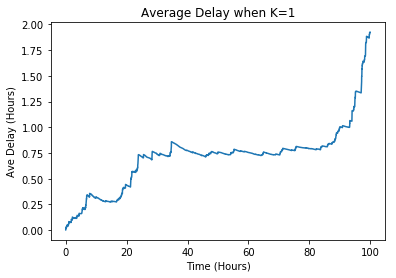

K,mu,lambda:  2 , 30 , 120 , Number of Blocks:  2892
Miner earnings:  [183.73 183.92 204.37 185.35 181.92 179.26 185.4  199.99 186.89 189.34]  Average:  188.0169999999999
Average transactions per block:  1.9993084370677732
Average fees per block:  0.650127939142462
Average money per block:  38.26590594744122
[0.         0.03429821 0.03969919 ... 0.11353295 0.09131532 0.20070533]


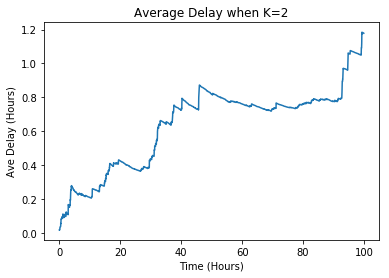

K,mu,lambda:  3 , 30 , 120 , Number of Blocks:  2951
Miner earnings:  [220.5  208.1  234.25 258.95 261.65 199.23 264.78 264.04 237.82 243.66]  Average:  239.29799999999994
Average transactions per block:  2.997627922738055
Average fees per block:  0.810904778041342
Average money per block:  52.15689596746866
[0.05328786 0.09220799 0.05001623 ... 0.12406882 0.26799618 0.43343433]


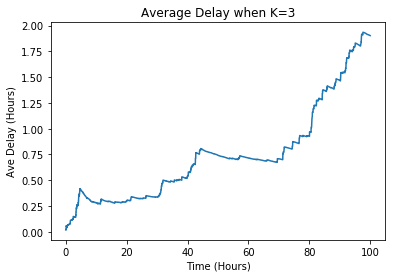

K,mu,lambda:  4 , 30 , 120 , Number of Blocks:  2917
Miner earnings:  [270.32 258.85 269.85 289.7  252.01 239.86 305.55 251.61 269.08 286.37]  Average:  269.3199999999999
Average transactions per block:  3.942406582104902
Average fees per block:  0.923277339732602
Average money per block:  61.28625299965718
[0.01268631 0.06257522 0.01220798 ... 0.18806522 0.8750319  1.74671444]


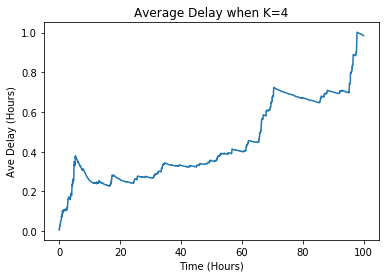

K,mu,lambda:  5 , 30 , 120 , Number of Blocks:  2991
Miner earnings:  [274.54 272.66 279.15 272.4  279.53 247.6  249.43 249.64 313.5  264.41]  Average:  270.286
Average transactions per block:  4.0591775325977935
Average fees per block:  0.9036643263122702
Average money per block:  60.59812771648278
[0.34828681 0.14545841 0.34933176 ... 0.47344281 0.12646008 0.08220111]


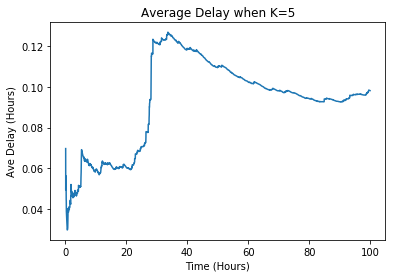

K,mu,lambda:  6 , 30 , 120 , Number of Blocks:  2922
Miner earnings:  [252.45 264.71 269.21 260.94 292.18 238.36 258.37 296.33 282.9  281.79]  Average:  269.72400000000005
Average transactions per block:  4.090349075975359
Average fees per block:  0.9230800821355235
Average money per block:  61.33607118412046
[0.05958219 0.01479016 0.0101902  ... 0.03213539 0.15090728 0.11990259]


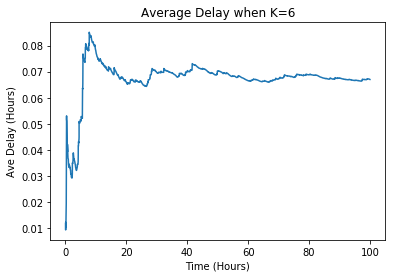

K,mu,lambda:  7 , 30 , 120 , Number of Blocks:  2998
Miner earnings:  [306.93 282.33 301.92 238.69 265.51 246.44 295.88 263.97 273.82 252.95]  Average:  272.84399999999994
Average transactions per block:  4.038025350233489
Average fees per block:  0.9100867244829886
Average money per block:  60.596731154102734
[0.02612878 0.         0.         ... 0.         0.24842751 0.2506443 ]


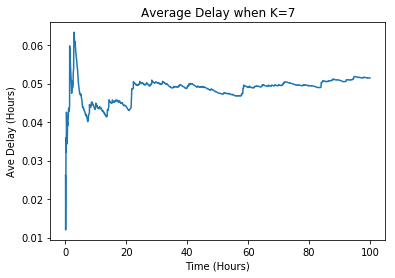

K,mu,lambda:  8 , 30 , 120 , Number of Blocks:  3104
Miner earnings:  [245.67 296.6  279.59 223.39 262.03 258.82 267.61 260.39 260.56 273.37]  Average:  262.803
Average transactions per block:  3.7941365979381443
Average fees per block:  0.8466591494845361
Average money per block:  56.6742912371134
[0.01787603 0.         0.00396703 ... 0.11684376 0.01678769 0.01421558]


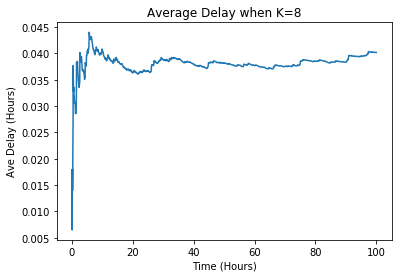

K,mu,lambda:  9 , 30 , 120 , Number of Blocks:  3076
Miner earnings:  [231.11 325.34 297.57 233.03 266.26 240.81 256.46 249.53 259.41 320.56]  Average:  268.0080000000001
Average transactions per block:  3.8982444733420025
Average fees per block:  0.8712873862158648
Average money per block:  58.10370611183355
[0.         0.00536952 0.         ... 0.30384059 0.00469508 0.02112505]


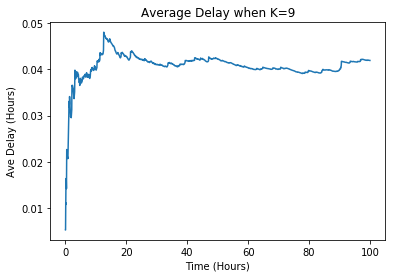

K,mu,lambda:  10 , 30 , 120 , Number of Blocks:  2969
Miner earnings:  [295.98 267.74 274.14 263.71 261.02 249.67 234.58 309.91 305.97 287.71]  Average:  275.043
Average transactions per block:  4.084203435500169
Average fees per block:  0.9263826204109129
Average money per block:  61.45705624789491
[0.00090495 0.50952539 0.46621356 ... 0.00856773 0.14366955 0.03437183]


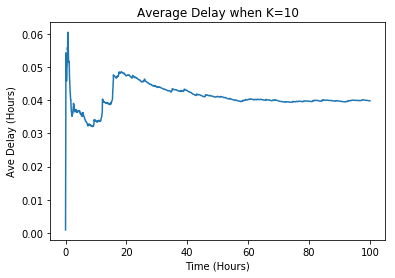

K,mu,lambda:  11 , 30 , 120 , Number of Blocks:  3083
Miner earnings:  [260.24 259.16 285.14 263.98 255.86 275.91 317.62 268.8  259.37 272.36]  Average:  271.84400000000005
Average transactions per block:  3.915990917937074
Average fees per block:  0.8817515407071035
Average money per block:  58.78884203697697
[0.         0.00965682 0.         ... 0.5290843  0.03055917 0.36471502]


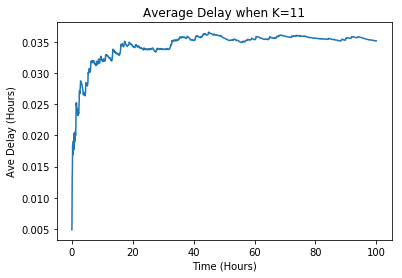

K,mu,lambda:  12 , 30 , 120 , Number of Blocks:  2952
Miner earnings:  [283.12 278.14 270.89 247.37 251.02 285.34 232.73 258.21 270.7  294.74]  Average:  267.22599999999994
Average transactions per block:  4.048441734417344
Average fees per block:  0.9052371273712738
Average money per block:  60.49932249322493
[0.00589048 0.         0.08984084 ... 0.         0.00331131 0.06518243]


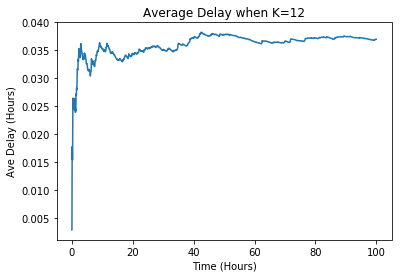

K,mu,lambda:  13 , 30 , 120 , Number of Blocks:  3013
Miner earnings:  [281.01 270.85 275.94 282.65 281.06 241.16 260.63 280.63 271.17 255.57]  Average:  270.0669999999999
Average transactions per block:  3.970461334218387
Average fees per block:  0.8963391968138069
Average money per block:  59.78791901759044
[0.02075246 0.20487366 0.53390574 ... 0.01637156 0.01071263 0.22000734]


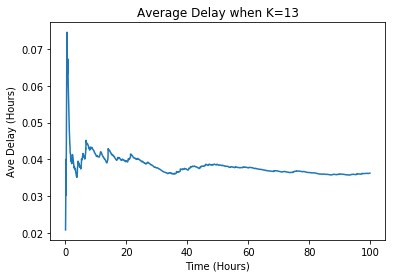

K,mu,lambda:  14 , 30 , 120 , Number of Blocks:  3040
Miner earnings:  [231.4  274.72 272.97 306.61 272.08 283.63 298.08 266.59 269.73 254.35]  Average:  273.0159999999999
Average transactions per block:  3.9621710526315788
Average fees per block:  0.898078947368421
Average money per block:  59.60888157894737
[0.03729097 0.01872619 0.01012619 ... 0.0021783  0.01007695 0.        ]


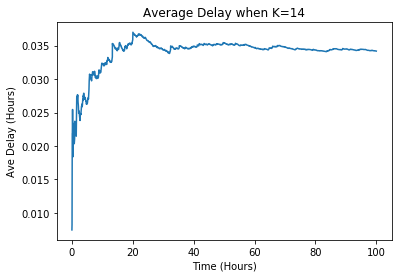

K,mu,lambda:  15 , 30 , 120 , Number of Blocks:  2927
Miner earnings:  [279.16 253.75 262.33 264.88 279.94 275.28 276.41 267.77 233.39 300.31]  Average:  269.322
Average transactions per block:  4.071062521352921
Average fees per block:  0.9201298257601641
Average money per block:  61.299624188589
[0.14002445 0.00037084 0.02775361 ... 0.03005924 0.23459113 0.00719687]


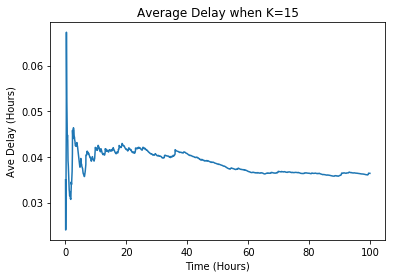

K,mu,lambda:  16 , 30 , 120 , Number of Blocks:  3100
Miner earnings:  [279.45 253.09 245.71 272.89 240.35 309.06 251.4  274.11 283.5  303.07]  Average:  271.26300000000003
Average transactions per block:  3.8767741935483873
Average fees per block:  0.875041935483871
Average money per block:  58.08096774193548
[3.15653560e-03 1.17184592e-01 4.17635705e-02 ... 0.00000000e+00
 1.85854417e-02 5.07067936e-06]


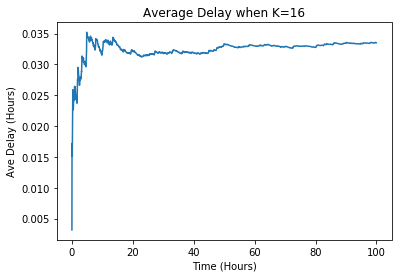

K,mu,lambda:  17 , 30 , 120 , Number of Blocks:  3002
Miner earnings:  [275.63 267.96 249.37 267.93 270.56 282.79 261.51 266.6  254.58 293.04]  Average:  268.99700000000007
Average transactions per block:  3.9816788807461694
Average fees per block:  0.8960592938041306
Average money per block:  59.98867421718854
[0.00472244 0.01970456 0.35030672 ... 0.08849396 0.01888413 0.        ]


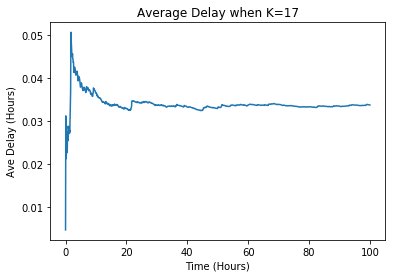

K,mu,lambda:  18 , 30 , 120 , Number of Blocks:  2880
Miner earnings:  [320.1  265.73 253.89 291.14 246.58 283.81 277.86 303.84 264.6  200.02]  Average:  270.75699999999995
Average transactions per block:  4.184027777777778
Average fees per block:  0.9401284722222221
Average money per block:  62.763888888888886
[0.         0.         0.01402935 ... 0.06559508 0.34502588 0.        ]


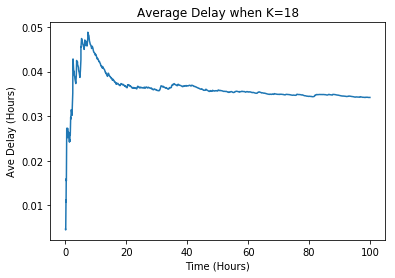

K,mu,lambda:  19 , 30 , 120 , Number of Blocks:  2935
Miner earnings:  [285.89 284.99 264.24 247.28 272.05 279.89 249.29 284.66 285.02 283.19]  Average:  273.65
Average transactions per block:  4.120272572402044
Average fees per block:  0.9323679727427598
Average money per block:  62.10664395229983
[0.         0.15622808 0.         ... 0.00656032 0.24178652 1.4972722 ]


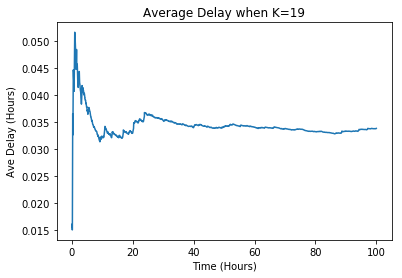

K,mu,lambda:  20 , 30 , 120 , Number of Blocks:  3019
Miner earnings:  [287.05 292.49 297.45 222.61 298.8  275.42 286.77 233.57 293.01 249.2 ]  Average:  273.637
Average transactions per block:  4.001324942033786
Average fees per block:  0.9063829082477641
Average money per block:  60.11328254388871
[0.         0.08082821 0.         ... 0.         0.42713688 0.57779059]


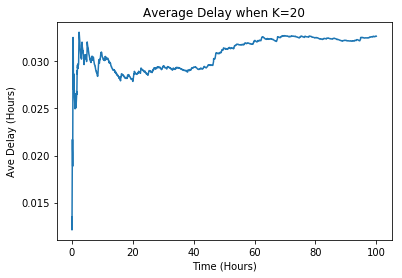

In [114]:
average_amt1 = []
average_num1 = []
average_fee1 = []
average_delay1 = []
for i in range(1,21,1):
    t = 0
    t_end = 100
    trans_rate = 120
    block_rate = 30
    Block = BlockQueue(block_rate,i)
    qsize = []
    times = []
    duration = []
    amountt = []
    
    total_rate = trans_rate + block_rate
    nextEventTime = t + np.random.exponential(1/total_rate)
    while t < t_end:
        t = nextEventTime
        U = np.random.rand()
        if U <=trans_rate/total_rate:
            event = 0 #transaction arrival
        else:
            event = 1 #block push

        if event == 0:
            newArrival = Transaction(t)
            Block.ArriveatQueue(newArrival)

        if event == 1:
            Block.pushBlock(t)
            
        qsize.append(len(Block.waitingentities))

        times.append(t)
        nextEventTime = t + np.random.exponential(1/total_rate)

    for j in np.arange(0,len(Block.finished)):
        duration.append(Block.finished[j].endtime - Block.finished[j].starttime)
        amountt.append(Block.finished[j].fee)

    print("K,mu,lambda: ", i, ",", block_rate,",", trans_rate,",", "Number of Blocks: ", Block.Numblocks)
    print("Miner earnings: ", Block.accounts, " Average: ", np.mean(Block.accounts))
    print("Average transactions per block: ", np.mean(Block.NumberinBlock))
    print("Average fees per block: ", np.mean(Block.totalfee))
    print("Average money per block: ", np.mean(Block.totalamount))
    cumu = np.sum(Block.totalamount)
    ave = cumu/Block.time[-1]
    
    feemu = np.sum(Block.totalfee)
    avef = feemu/Block.time[-1]
    
    bnum = np.sum(Block.NumberinBlock)
    avenum = bnum/Block.time[-1]
    
    print(np.array(Block.avetime))
    femu = np.cumsum(Block.avetime)
    avet = femu/np.cumsum(Block.NumberinBlock)
    plt.plot(Block.time, avet)
    plt.ylabel("Ave Delay (Hours)")
    plt.xlabel("Time (Hours)")
    plt.title("Average Delay when K={}".format(i))
    plt.show()
    
    aved = femu[-1]/np.sum(Block.NumberinBlock)
    
    average_delay1.append(aved)
    average_fee1.append(avef)
    average_amt1.append(ave)
    average_num1.append(avenum)

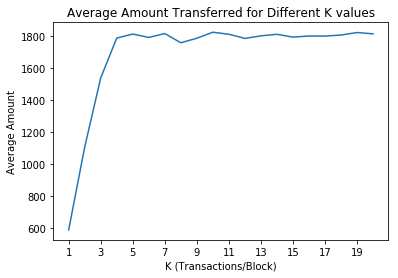

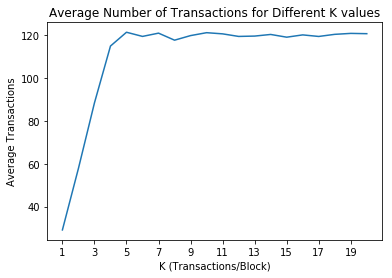

In [116]:
plt.plot(np.arange(1,21), average_amt1)
plt.xticks(np.arange(1, 21, 2))
plt.ylabel("Average Amount")
plt.xlabel("K (Transactions/Block)")
plt.title("Average Amount Transferred for Different K values")
plt.show()

plt.plot(np.arange(1,21), average_num1)
plt.xticks(np.arange(1, 21, 2))
plt.ylabel("Average Transactions")
plt.xlabel("K (Transactions/Block)")
plt.title("Average Number of Transactions for Different K values")
plt.show()

plt.plot(np.arange(1,21), average_fee1)
plt.xticks(np.arange(1, 21, 2))
plt.ylabel("Average Fees")
plt.xlabel("K (Transactions/Block)")
plt.title("Average Fees for Different K values")
plt.show()

plt.plot(np.arange(1,21), average_delay1)
plt.xticks(np.arange(1, 21, 2))
plt.ylabel("Average Delay")
plt.xlabel("K (Transactions/Block)")
plt.title("Average Delay for Different K values")
plt.show()

In [57]:
print(np.array(ave)[-1])
print(np.array(avenum)[-1])

[2442.12633637 2179.73026367 1700.99875621 ... 1772.48514252 1772.46649384
 1772.42043311]
[143.65449037 137.18582079 105.37160437 ... 118.16800986 118.16609975
 118.16302899]


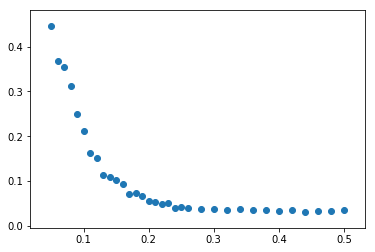

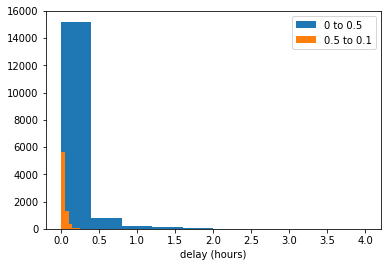

0.13601695841224187 0.03503714859398411 0.292764386537681 0.0385033496198127


In [36]:
new = saved.groupby(['fee amount']).mean().reset_index()
plt.scatter(new['fee amount'], new['delay(hours)'])
plt.show()

from scipy.stats import norm

amounttt = np.array(amountt)
delayy = np.array(duration)
where = np.where(np.logical_and(amounttt >= 0, amounttt <= 0.25))
plt.hist(delayy[where],label = "0 to 0.5")
plt.xlabel("delay (hours)")
mu1, std1 = norm.fit(delayy[where])

where = np.where(np.logical_and(amounttt > 0.25, amounttt <= 0.5))
plt.hist(delayy[where],label = "0.5 to 0.1")
mu3, std3 = norm.fit(delayy[where])

plt.legend()
plt.show()
print(mu1,mu3,std1, std3)


In [42]:
mod = gp.GaussianProcessRegressor().fit(new["delay(hours)"][:, np.newaxis], new["fee amount"])

In [52]:
mod.predict([[.001], [.5]])

array([0.72560304, 0.07124698])